# Restaurant Business Rankings 2020

In [ ]:
pip install wordcloud


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install dash

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import re
from PIL import Image

- Describe the objectives, questions, results

In [ ]:
df_250 = pd.read_csv('Top250.csv')
df_250.head()

In [ ]:
df_future = pd.read_csv('Future50.csv')
df_future.head()

,"r""Rank""",Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


In [ ]:
df_ind = pd.read_csv('Independence100.csv')
df_ind.head()

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0


In [ ]:
df_ind.rename(columns={'Average Check':'Average_Check'},inplace=True)
df_ind

,Rank,Restaurant,Sales,Average_Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0
...,...,...,...,...,...,...,...
95,96,George's at the Cove,12194000.0,80,La Jolla,Calif.,250000.0
96,97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0
97,98,Mi Vida,12032014.0,38,Washington,D.C.,226226.0
98,99,Upland,11965564.0,52,New York,N.Y.,171825.0


# Top 250 Restaurants

## What happend to Top Resturants Sales During 2020 ?

We are going to see some insights of the top 250 restaurants

In [ ]:
# We drop the columns that won't be useful for us
df_250.drop(['Content','Headquarters'],axis=1,inplace=True)

#### Null values checking

In [ ]:
print ("Rows     : " ,df_250.shape[0])
print ("Columns  : " ,df_250.shape[1])
print ("\nFeatures : \n" ,df_250.columns.tolist())
print ("\nMissing values :  ", df_250.isnull().sum().values.sum())
print ("\nUnique values :  \n",df_250.nunique())

Rows     :  250
Columns  :  7

Features : 
 ['Rank', 'Restaurant', 'Sales', 'YOY_Sales', 'Units', 'YOY_Units', 'Segment_Category']

Missing values :   0

Unique values :  
 Rank                250
Restaurant          250
Sales               203
YOY_Sales           172
Units               214
YOY_Units           140
Segment_Category     48
dtype: int64


#### Rename columns

In [ ]:
df_250.rename(columns={'Units':'Branches','Segment_Category':'sub_category'},inplace=True)
df_250

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger
...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,129,-10.4%,18,-5.3%,Varied Menu
246,247,PDQ,127,-5.5%,56,-11.1%,Chicken
247,248,Lupe Tortilla,127,12.1%,25,8.7%,Mexican
248,249,Cook-Out Restaurant,126,10.1%,270,7.1%,Burger


#### Checking for any independence restaurant in the top 250

In [ ]:
rest_ind = list(df_ind['Restaurant'].values)
df_250['ind_100']=df_250['Restaurant'].apply(lambda x:1 if x in rest_ind else 0 )
df_250['ind_100'].value_counts()

0    250
Name: ind_100, dtype: int64

#### Replace pourcentages by floats

In [ ]:
df_250['YOY_Sales']=df_250['YOY_Sales'].apply(lambda x:x.replace('%',''))
df_250['YOY_Units']=df_250['YOY_Units'].apply(lambda x:x.replace('%',''))

df_250['YOY_Sales']= pd.to_numeric(df_250['YOY_Sales'])
df_250['YOY_Units']=pd.to_numeric(df_250['YOY_Units'])

In [ ]:
df_250.describe()

,Rank,Sales,YOY_Sales,Branches,YOY_Units,ind_100
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.0
mean,125.500000,1242.74000,2.938400,850.076000,1.219200,0.0
std,72.312977,3365.22882,8.953784,2296.151659,7.936431,0.0
min,1.000000,126.00000,-21.200000,13.000000,-32.800000,0.0
25%,63.250000,181.00000,-2.375000,85.000000,-2.025000,0.0
50%,125.500000,330.00000,2.200000,207.000000,0.000000,0.0
75%,187.750000,724.75000,6.575000,555.250000,3.475000,0.0
max,250.000000,40412.00000,39.500000,23801.000000,38.500000,0.0


#### Manipulate with YOY values

**Year on Year sales** correspond to the sales that has been made year to year. This is a popular and effective way to evaluate the financial performance of a company and the performance of investments.
Any measurable event that repeats annually can be compared on a YOY basis.

In [ ]:
df_250['Sales_year']=df_250['YOY_Sales'].apply(lambda x:'positive' if x>0 else 'negative')
df_250['unit_stat']=df_250['YOY_Units'].apply(lambda x:'positive' if x>0 else 'negative')

#### Creating category feature

In [ ]:
df_250['category']=df_250['sub_category'].apply(lambda x:x.replace('Quick Service & Burger','Burger').replace(
                                                      'Italian/Pizza','Pizza').replace('Quick Service & Pizza','Pizza').replace(
'Bakery Cafe ','Cafe').replace('Coffee Cafe','Cafe')).replace('Quick Service & Chicken','Chicken').replace('Casual Dining & Pizza','Pizza').replace(
'Quick Service & Cafe','Cafe').replace('Fast Casual & Pizza','Pizza').replace('Fast Casual & Bakery Cafe','Cafe').replace('Quick Service & Frozen Desserts','Dessert').replace(
'Quick Service & Family Casual','Family').replace('Casual Dining & Asian','Asian').replace('Asian/Noodle','Asian').replace('Casual Dining & Seafood','Seafood').replace(
'Bakery Cafe','Cafe').replace('Frozen Desserts','Dessert').replace('Family Dining & Family Style','Family').replace('Fast Casual & Sandwich','Sandwich').replace(
'Family Casual','Family').replace('Fast Casual & Chicken','Chicken').replace('Fast Casual & Burger','Burger').replace('Casual Dining & Steak','Steak').replace(
'Casual Dining & Sports Bar','Sports Bar').replace('Quick Service & Mexican','Mexican').replace('Quick Service & Mexican','Mexican').replace(
'Quick Service & Seafood','Seafood').replace('Quick Service & Sandwich','Sandwich').replace('Seafodd','Seafood').replace('Fine Dining & Steak','Steak').replace(
'Quick Service & Bakery Cafe','Cafe').replace('Fast Casual & Asian/Noodle','Asia').replace('Quick Service & Snack','Snack').replace(
'Fast Casual & Mexican','Mexican').replace('Quick Service & Beverage','Drinks').replace('Asian','Asia').replace('Sports Bar','Sports Bar').replace(
'Casual Dining & Varied Menu','Varied Menu').replace('Steak','Meat').replace('BBQ','Meat').replace('Family Style','Family')


In [ ]:
df_250.head()

,Rank,Restaurant,Sales,YOY_Sales,Branches,YOY_Units,sub_category,ind_100,Sales_year,unit_stat,category
0,1,McDonald's,40412,4.9,13846,-0.5,Quick Service & Burger,0,positive,negative,Burger
1,2,Starbucks,21380,8.6,15049,3.0,Quick Service & Coffee Cafe,0,positive,positive,Cafe
2,3,Chick-fil-A,11320,13.0,2470,5.0,Quick Service & Chicken,0,positive,positive,Chicken
3,4,Taco Bell,11293,9.0,6766,2.7,Quick Service & Mexican,0,positive,positive,Mexican
4,5,Burger King,10204,2.7,7346,0.2,Quick Service & Burger,0,positive,positive,Burger


### Year on Year Distribution

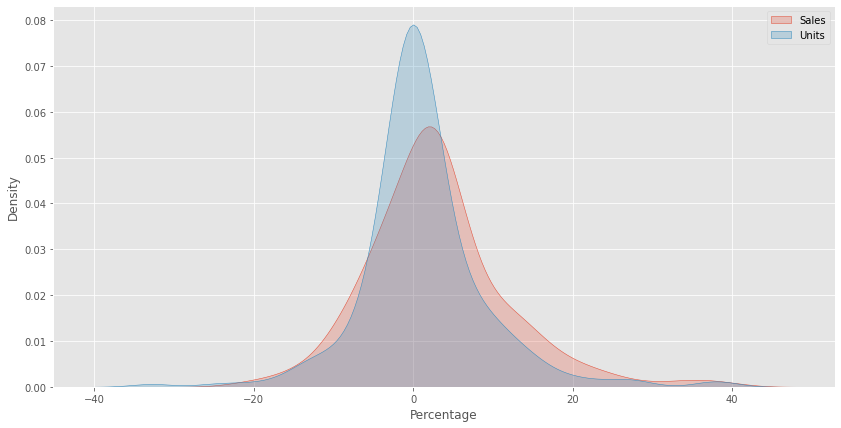

In [ ]:
plt.figure(figsize=(14,7))
sns.kdeplot(df_250['YOY_Sales'].values, shade = True)
sns.kdeplot(df_250['YOY_Units'].values, shade = True)
plt.legend(['Sales','Units'])
plt.xlabel('Percentage');

These Distributions shows us that year on year sales percentage no more than 40%

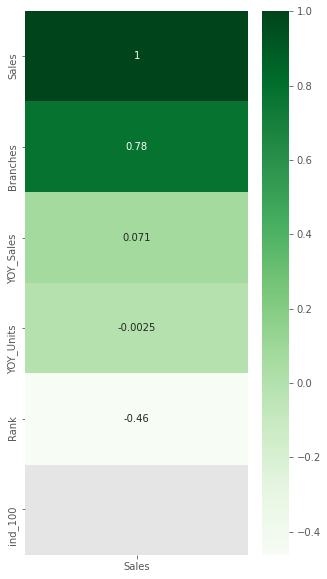

In [ ]:
corr = df_250.corr().loc[:,['Sales']]

fig, ax = plt.subplots(figsize=(5,10))

ax = sns.heatmap(corr.sort_values(by=['Sales'],ascending=False), ax=ax,annot=True,cbar=True,cmap="Greens")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

We can observe that sales are high correlated with branches 

### Year on Year Sales Indicator

In [ ]:
plt.figure(figsize=(14,7));
Platform = df_250['Sales_year'].value_counts(sort = True).index
Count = df_250['Sales_year'].value_counts(sort = True)

fig = px.pie(names = Platform,
             values = Count,
             title='Year on year sales of the top 250 restaurants')
fig.update_traces(textposition='inside', textinfo='percent+label')

<Figure size 1008x504 with 0 Axes>

Although the restaurants were on the best list during the year, about 35% of restaurants had negative indicators

In [ ]:
plt.figure(figsize=(40,40));

df = px.data.tips()
fig = px.sunburst(df_250, path=['category', 'sub_category'], values='Sales')
fig.show()

<Figure size 2880x2880 with 0 Axes>

This sunburst chart shows that quick-service subcategory always get high sales.

We can explain this by the pandemic of COVID-19 : restaurants are closed and only propose take away food offers. So the more profitable sub category is the Quick Service no matter what is the category.

## Category Sales Indicator

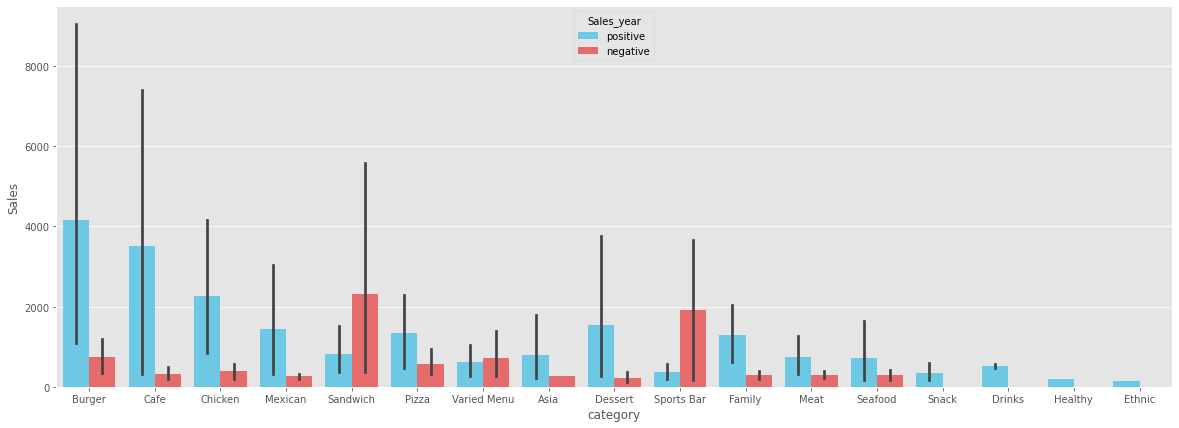

In [ ]:
plt.figure(figsize=(20,7))

pal = ["#58D3F7","#FA5858"]

sns.barplot(data=df_250,x=df_250['category'],y=df_250['Sales'],hue=df_250['Sales_year'],palette=pal);

The categories varied menu, sandwiches and sports bar had more negative indicators than positive. It can be explained that those categories are less attractive in this period with the pandemic. The sales are higher for the other categories.

## Top Resturants In Best Category

Pizza 🍕

In [ ]:
pizza = df_250.query("category == 'Pizza'")[:10]

fig = px.bar(pizza,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Viridis',
             title='Pizza Sales Top Restaurants')
fig.show()

Burger 🍔

In [ ]:
Burger = df_250.query("category == 'Burger'")[:10]

fig = px.bar(Burger,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='BlackBody',
             title='Burger Top Restaurants')
fig.show()

Varied Menu ✔️

In [ ]:
VariedMenu = df_250.query("category == 'Varied Menu'")[:10]

fig = px.bar(VariedMenu,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Plotly3',
             title='VariedMenu Top Restaurants')
fig.show()

Family 👪

In [ ]:
Family = df_250.query("category == 'Family'")[:10]

fig = px.bar(Family,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Turbo',
             title='Family Top Restaurants')
fig.show()

Meat 🥩

In [ ]:
Meat = df_250.query("category == 'Meat'")[:10]

fig = px.bar(Meat,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Jet',
             title='Meat Top Restaurants')
fig.show()

Mexican 🌮

In [ ]:
Mexican = df_250.query("category == 'Mexican'")[:10]

fig = px.bar(Mexican,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Aggrnyl',
             title='Mexican Top Restaurants')
fig.show()

Cafe ☕

In [ ]:
Cafe = df_250.query("category == 'Cafe'")[:10]

fig = px.bar(Cafe,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Darkmint',
             title='Cafe Top Restaurants')
fig.show()

Sandwich 🥪

In [ ]:
Sandwich = df_250.query("category == 'Sandwich'")[:10]

fig = px.bar(Sandwich,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Magenta',
             title='Sandwich Top Restaurants')
fig.show()

Chicken 🐔

In [ ]:
Chicken = df_250.query("category == 'Chicken'")[:10]

fig = px.bar(Chicken,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='Brwnyl',
             title='Chicken Top Restaurants')
fig.show()

Drinks 🍸

In [ ]:
Drinks = df_250.query("category == 'Drinks'")[:10]

fig = px.bar(Drinks,
             x='Restaurant',
             y='Sales',
             color='Sales',
             color_continuous_scale='thermal',
             title='Drinks Top Restaurants')
fig.show()

### What happend to Top 250 Resturants Sales During 2020 ?

1-Number of Branches is the Highest Correlated column with Sales

2-35% Year on year for Top Restaurants are Negative

3-Burger Restaurants represent the highest Sales in 2020

4-Quick Service is an optimal solution to get high sales

5-Sports Bar and Sandwich Restaurants face Big losses

# Top 50 Future Restaurants

## What can we expect for the top 50 future restaurants ?

In [ ]:
df_future.head(10)

,"r""Rank""",Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


### How many restaurants from the future top 50 are franchising ?

In [ ]:
Platform = df_future['Franchising'].value_counts(sort = True).index
Count = df_future['Franchising'].value_counts(sort = True)
#====
fig = px.pie(names = Platform,
             values = Count,
             title='Are the restaurants from the future top 50 franchising ?')
fig.update_traces(textposition='inside', textinfo='percent+label')

### Sales of restaurants depending on franchising

In [ ]:
df_future['YOY_Sales']=df_future['YOY_Sales'].apply(lambda x:x.replace('%',''))
#====
df_future['YOY_Sales']= pd.to_numeric(df_future['YOY_Sales'])
#===
franch = df_future.groupby('Franchising',as_index=False).agg({'YOY_Sales':'sum'})
fig = px.bar(franch,
             x='Franchising',
             y='YOY_Sales',
             color='YOY_Sales',
             color_continuous_scale='thermal',
             title='Year on year sales of restaurants depending on franchising')
fig.show()

### Correlation with Year on year sales

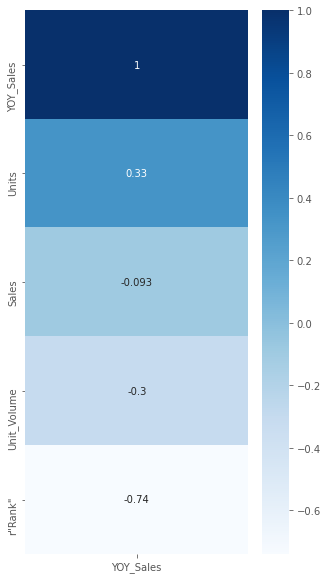

In [ ]:
corr = df_future.corr().loc[:,['YOY_Sales']]

fig, ax = plt.subplots(figsize=(5,10))

ax = sns.heatmap(corr.sort_values(by=['YOY_Sales'],ascending=False), ax=ax,annot=True,cbar=True,cmap="Blues")
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

The rank is the highest anti correlated with the year on year sales.

None of them are highly correlated with the year on year sales.

In [ ]:
df_ind

,Rank,Restaurant,Sales,Average_Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0
...,...,...,...,...,...,...,...
95,96,George's at the Cove,12194000.0,80,La Jolla,Calif.,250000.0
96,97,Le Coucou,12187523.0,95,New York,N.Y.,87070.0
97,98,Mi Vida,12032014.0,38,Washington,D.C.,226226.0
98,99,Upland,11965564.0,52,New York,N.Y.,171825.0


In [ ]:
df_ind.columns

Index(['Rank', 'Restaurant', 'Sales', 'Average_Check', 'City', 'State',
       'Meals Served'],
      dtype='object')

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import numpy as np
from dash.dependencies import Output, Input


external_stylesheets = [
    {
        "href": "https://fonts.googleapis.com/css2?"
        "family=Lato:wght@400;700&display=swap",
        "rel": "stylesheet",
    },
]
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = "Restaurant Rankings : The independence top 100 !"

app.layout = html.Div(
    children=[
        html.Div(
            children=[
                html.P(children="🍽️", className="header-emoji"),
                html.H1(
                    children="Restaurant Rankings", className="header-title"
                ),
                html.P(
                    children="Analyze the behavior of restaurants"
                    " and their sales in the differents states of the US"
                    " in 2020",
                    className="header-description",
                ),
            ],
            className="header",
        ),
        html.Div(
            children=[
                html.Div(
                    children=[
                        html.Div(children="State", className="menu-title"),
                        dcc.Dropdown(
                            id="state-filter",
                            options=[
                                {"label": State, "value": State}
                                for state in np.sort(df_ind.State.unique())
                            ],
                            value="N.Y.",
                            clearable=False,
                            className="dropdown",
                        ),
                    ]
                ),
                html.Div(
                    children=[
                        html.Div(
                            children="Check Range",
                            className="menu-title"
                            ),
                        dcc.CheckRange(
                            id="check-range",
                            min_check_allowed=data.Average_Check.min(),
                            max_check_allowed=data.Average_Check.max(),
                            start_check=data.Average_Check.min(),
                            end_check=data.Average_Check.max(),
                        ),
                    ]
                ),
            ],
            className="menu",
        ),
        html.Div(
            children=[
                html.Div(
                    children=dcc.Graph(
                        id="sales-chart", config={"displayModeBar": False},
                    ),
                    className="card",
                ),
                html.Div(
                    children=dcc.Graph(
                        id="check-chart", config={"displayModeBar": False},
                    ),
                    className="card",
                ),
            ],
            className="wrapper",
        ),
    ]
)


@app.callback(
    [Output("sales-chart", "figure"), Output("check-chart", "figure")],
    [
        Input("state-filter", "value"),
        Input("check-range", "start_check"),
        Input("check-range", "end_check"),
    ],
)
def update_charts(State, start_check, end_check):
    mask = (
        (data.State == State)
        & (data.Average_Check >= start_check)
        & (data.Average_Check <= end_check)
    )
    filtered_data = data.loc[mask, :]
    sales_chart_figure = {
        "data": [
            {
                "x": filtered_data["State"],
                "y": filtered_data["Sales"],
                "type": "lines",
                "hovertemplate": "$%{y:.2f}<extra></extra>",
            },
        ],
        "layout": {
            "title": {
                "text": "Sales of the restaurant",
                "x": 0.05,
                "xanchor": "left",
            },
            "xaxis": {"fixedrange": True},
            "yaxis": {"tickprefix": "$", "fixedrange": True},
            "colorway": ["#17B897"],
        },
    }

    check_chart_figure = {
        "data": [
            {
                "x": filtered_data["State"],
                "y": filtered_data["Average_Check"],
                "type": "lines",
            },
        ],
        "layout": {
            "title": {"text": "Average Check of the restaurants", "x": 0.05, "xanchor": "left"},
            "xaxis": {"fixedrange": True},
            "yaxis": {"fixedrange": True},
            "colorway": ["#E12D39"],
        },
    }
    return sales_chart_figure, check_chart_figure


if __name__ == "__main__":
    app.run_server(debug=True)

NameError: name 'State' is not defined

In [ ]:
html.Div(
    children=[
        html.Div(
            children=[
                html.Div(children="Region", className="menu-title"),
                dcc.Dropdown(
                    id="region-filter",
                    options=[
                        {"label": region, "value": region}
                        for region in np.sort(data.region.unique())
                    ],
                    value="Albany",
                    clearable=False,
                    className="dropdown",
                ),
            ]
        ),
        html.Div(
            children=[
                html.Div(children="Type", className="menu-title"),
                dcc.Dropdown(
                    id="type-filter",
                    options=[
                        {"label": avocado_type, "value": avocado_type}
                        for avocado_type in data.type.unique()
                    ],
                    value="organic",
                    clearable=False,
                    searchable=False,
                    className="dropdown",
                ),
            ],
        ),
        html.Div(
            children=[
                html.Div(
                    children="Date Range",
                    className="menu-title"
                    ),
                dcc.DatePickerRange(
                    id="date-range",
                    min_date_allowed=data.Date.min().date(),
                    max_date_allowed=data.Date.max().date(),
                    start_date=data.Date.min().date(),
                    end_date=data.Date.max().date(),
                ),
            ]
        ),
    ],
    className="menu",
),


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ebd8e12e-ad48-44fc-bd91-e3956ba35dcf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>